# Project 1 - IE5202
### Author : Gabriel Azevedo Ferreira

Importing main packages and loading data 

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import sklearn as sk


from mpl_toolkits.mplot3d import Axes3D
import pylab

%matplotlib inline

data = pd.read_csv("P1TrainingData.csv",header=None)

target = data[[0]]
features = data[data.columns[1:42]]

numerical_features = features[features.columns[0:39]]
data

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,65,166,2,0,24,WED,SAT
1,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,10,132,1,0,24,THU,FRI
2,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,14,133,2,0,24,FRI,SAT
3,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,3,7,-3,62,131,1,0,24,FRI,MON
4,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,1,0,58,142,5,0,24,MON,WED
5,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,60,166,1,0,24,TUE,FRI
6,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,68,145,2,0,24,WED,SAT
7,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,1,1,-1,32,157,2,0,24,THU,SAT
8,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,35,177,5,0,24,FRI,SAT
9,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,48,126,1,0,24,FRI,SUN


In [87]:
#preprocessing (converting weekdays to numbers)
data.loc[data.loc[:,40] == 'FRI',40] = 6
data.loc[data.loc[:,40] == 'THU',40] = 5
data.loc[data.loc[:,40] == 'WED',40] = 4
data.loc[data.loc[:,40] == 'TUE',40] = 3
data.loc[data.loc[:,40] == 'MON',40] = 2
data.loc[data.loc[:,40] == 'SUN',40] = 1
data.loc[data.loc[:,40] == 'SAT',40] = 7

data.loc[data.loc[:,41] == 'FRI',41] = 6
data.loc[data.loc[:,41] == 'THU',41] = 5
data.loc[data.loc[:,41] == 'WED',41] = 4
data.loc[data.loc[:,41] == 'TUE',41] = 3
data.loc[data.loc[:,41] == 'MON',41] = 2
data.loc[data.loc[:,41] == 'SUN',41] = 1
data.loc[data.loc[:,41] == 'SAT',41] = 7
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,65,166,2,0,24,4,7
1,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,10,132,1,0,24,5,6
2,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,14,133,2,0,24,6,7
3,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,3,7,-3,62,131,1,0,24,6,2
4,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,1,0,58,142,5,0,24,2,4


In [88]:
#configuring print options
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

### Visualizing data

[ 0.45041  0.10444  0.06395  0.04774  0.04577  0.04292  0.03276  0.02667
  0.0261   0.02522]


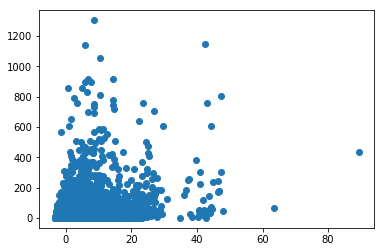

In [3]:
#PCA
pca = sk.decomposition.PCA(n_components=10)
num_var_reduced = sk.preprocessing.scale(numerical_features)
new_matrix = pca.fit_transform(num_var_reduced)
print pca.explained_variance_ratio_
plt.scatter(new_matrix[:,0],target)

plt.show()

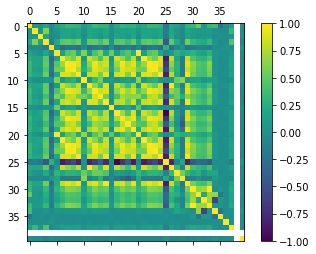

In [4]:
correlations = data[data.columns[0:40]].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

Visualizing correlations in the chosen ones in two ways

In [9]:
from pandas.tools.plotting import scatter_matrix

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


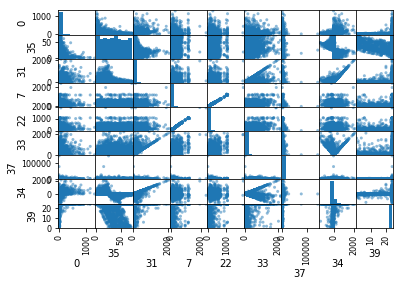

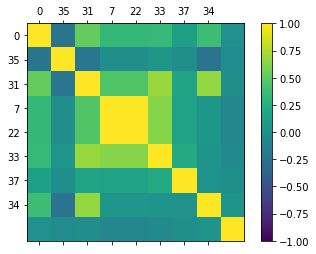

In [89]:
decided_df = pd.concat(
[
    target,
    data[[35,31,7,22,33,37,34,39]]
],axis = 1
)
scatter_matrix(decided_df)
plt.show()

correlations = decided_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = [0,35,31,7,22,33,37,34]
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Correlation between target and features
Obs: not by coincidence, those last features produced the best regression!

In [7]:
correlation_array = np.corrcoef(
    np.transpose(data[data.columns[0:38]])
    )[0,:]
columns_sorted_by_correlation = np.argsort(abs(correlation_array))

print columns_sorted_by_correlation
print correlation_array[columns_sorted_by_correlation]

[36 15 28  2  1 32  4 10 37  5 27 20  3 26 25 11 35 21 16  6 18 24 19 14  9
 29 13 17 23  8 30 22  7 33 12 34 31  0]
[ -6.21987515e-04   1.18996672e-02  -1.95041634e-02   2.29821810e-02
   5.89180511e-02   7.20882580e-02  -7.36726561e-02   1.03344723e-01
   1.39294948e-01   1.56940135e-01   1.62491610e-01   1.64300315e-01
   1.77330428e-01   2.13865672e-01  -2.14046710e-01   2.17753613e-01
  -2.21961720e-01   2.25907805e-01   2.29884077e-01   2.31431792e-01
   2.76432390e-01   2.95221415e-01   2.96790038e-01   2.97202631e-01
   3.00228579e-01   3.08800121e-01   3.09461428e-01   3.17867415e-01
   3.24372635e-01   3.25366534e-01   3.26881971e-01   3.33990354e-01
   3.34985682e-01   3.41741477e-01   3.44827431e-01   3.78452800e-01
   5.28696267e-01   1.00000000e+00]


### Step 1 : Simple regression model

Regression with the variables with most correlation




#### One single variable

34
Coefficients:  [[ 0.1426]] intercept:  [ 6.96113]
Mean squared error: 1079.39
r^2 score:  0.143226521504


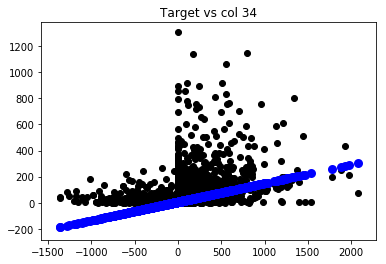

31
Coefficients:  [[ 0.24332]] intercept:  [ 1.92445]
Mean squared error: 907.68
r^2 score:  0.279519742419


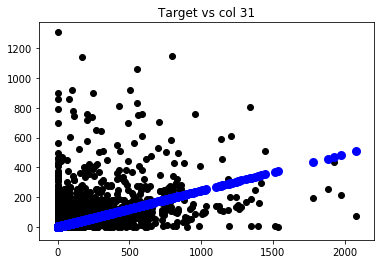

0
Coefficients:  [[ 1.]] intercept:  [-0.]
Mean squared error: 0.00
r^2 score:  1.0


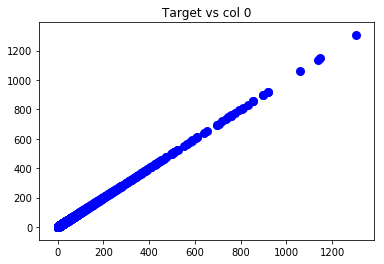

In [101]:
#selecting columns
regression_on_feature = []
for i,col in enumerate([34, 31,  0]):
        regression_on_feature.append(sk.linear_model.LinearRegression())
        regression_on_feature[i].fit(
                                 data[[col]]
                                ,target)
        #prediction
        pred = regression_on_feature[i].predict(data[[col]])
        
        # The coefficients
        print `col`
        print'Coefficients: ', regression_on_feature[i].coef_,
        print'intercept: ',regression_on_feature[i].intercept_
        print("Mean squared error: %.2f" % mean_squared_error(target, pred))
        print'r^2 score: ', regression_on_feature[i].score(data[[col]],target)
        
        # Plot outputs
        plt.title('Target vs col ' + `col`)
        plt.scatter(data[[col]], target,  color='black')
        plt.scatter(data[[col]], pred  ,  color='blue', linewidth=3)

        plt.show()

No cross validation was done because the results were nnot satisfying even in the training set.

#### One variable polynomio

39	Coefficients:  [[-2.56896  0.99687 -0.1316   0.00731 -0.00014 -0.00013]] intercept:  [ 2.36507]
Mean squared error: 1259.05
r^2 score:  0.000621218405162


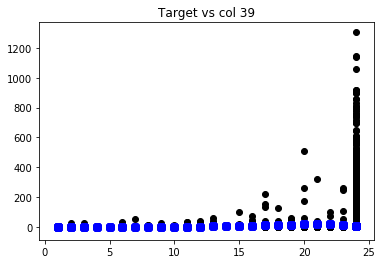

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


34	Coefficients:  [[ 0.13223  0.00035 -0.      -0.       0.       0.00082]] intercept:  [ 3.3618]
Mean squared error: 925.86
r^2 score:  0.265092755413


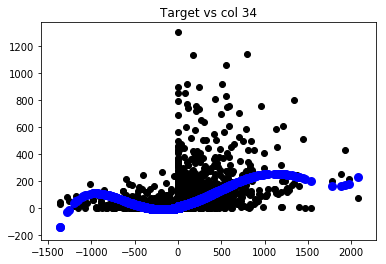

31	Coefficients:  [[ 0.29703  0.00001 -0.      -0.       0.      -0.00006]] intercept:  [ 1.18609]
Mean squared error: 886.53
r^2 score:  0.296311413123


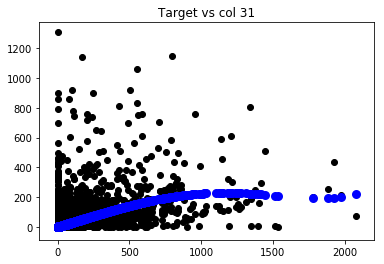

0	Coefficients:  [[ 1. -0.  0. -0.  0. -0.]] intercept:  [-0.]
Mean squared error: 0.00
r^2 score:  1.0


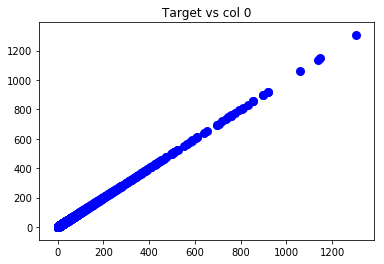

In [97]:
#selecting columns
regression_on_feature = []
for i,col in enumerate([39, 34, 31, 0]):
        exponentaial_transformation = np.exp(data[[col]])
        exponentaial_transformation[exponentaial_transformation > 1.0e+04] = 1.0e+04 #truncation
        polynomio_matrix = pd.concat(
                                        [
                                            data[[col]],
                                            data[[col]]*data[[col]],
                                            data[[col]]*data[[col]]*data[[col]],
                                            data[[col]]*data[[col]]*data[[col]]*data[[col]],
                                            data[[col]]*data[[col]]*data[[col]]*data[[col]]*data[[col]],
                                            exponentaial_transformation
                                        ]
                                        ,axis=1
                                    )
        
        
        regression_on_feature.append(sk.linear_model.LinearRegression())
        regression_on_feature[i].fit(
                                 polynomio_matrix
                                ,target)
        #prediction
        pred = regression_on_feature[i].predict(polynomio_matrix)
        
        # The coefficients
        print `col` + '\t',
        print'Coefficients: ', regression_on_feature[i].coef_,
        print'intercept: ',regression_on_feature[i].intercept_
        print("Mean squared error: %.2f" % mean_squared_error(target, pred))
        print'r^2 score: ', regression_on_feature[i].score(polynomio_matrix,target)
        
        # Plot outputs
        plt.title('Target vs col ' + `col`)
        plt.scatter(data[[col]], target,  color='black')
        plt.scatter(data[[col]], pred  ,  color='blue', linewidth=3)

        plt.show()

#### 6 variables simple regression
We first used the variables with greatest correlation coefficient with the target.

0	Coefficients:  [[-0.74331899  0.71197723 -0.03732684  0.13720786  0.00645164  0.24285697]] intercept:  [ 0.28914462]
Mean squared error: 876.36
r^2 score:  0.304380777618


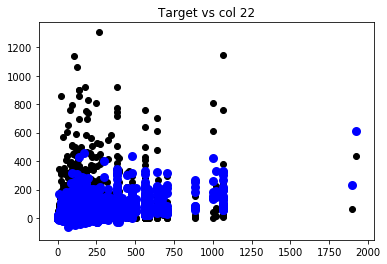

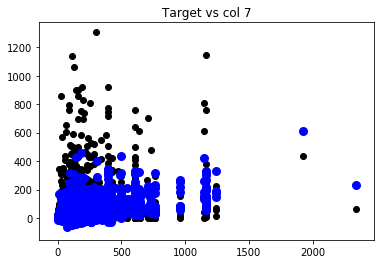

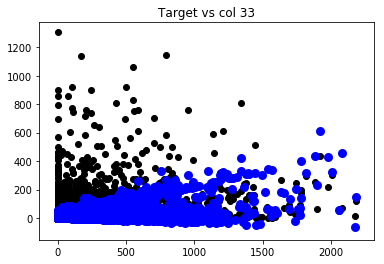

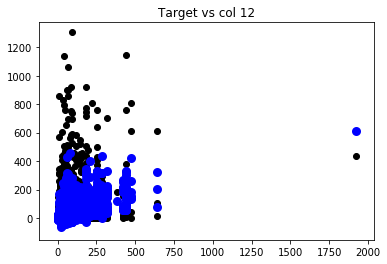

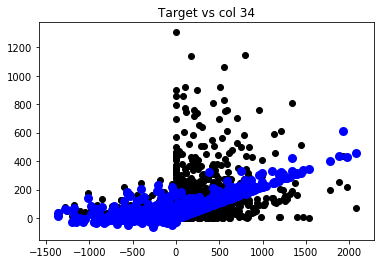

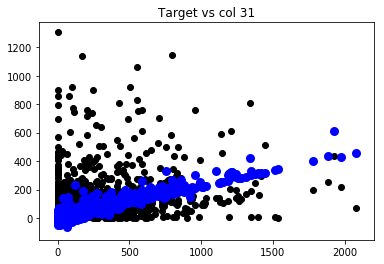

In [27]:
#selecting columns
selected_features = features[[22, 7, 33, 12, 34, 31]]
        
regression_on_feature.append(sk.linear_model.LinearRegression())
regression_on_feature[i].fit(
                         selected_features
                        ,target)
#prediction
pred = regression_on_feature[i].predict(selected_features)

# The coefficients
print `col` + '\t',
print'Coefficients: ', regression_on_feature[i].coef_,
print'intercept: ',regression_on_feature[i].intercept_
print("Mean squared error: %.2f" % mean_squared_error(target, pred))
print'r^2 score: ', regression_on_feature[i].score(selected_features,target)


for col in [22, 7, 33, 12, 34, 31]:
    # Plot outputs
    plt.title('Target vs col ' + `col`)
    plt.scatter(data[[col]], target,  color='black')
    plt.scatter(data[[col]], pred  ,  color='blue', linewidth=3)

    plt.show()

Then we performed a mix of "brute force algorithm" and greedy algorithm to selected the best 6 variables:
- We found, by brute force, the best regressions with 4 variables (the ones with the least $r^2$)
- We took from it only the 3 most frequent variables (the ones that appeared most often on the 10 better regressions)
- we found the best 6 variables regression where the 3 previously selected variables were present

In [28]:
#selecting best 4 features

combination_of_cols = []
r2 = []

t = 0

for col3 in range(1,39-3):
    for col4 in range(col3+1,39-2):
        for col5 in range(col4+1,39-1):
            for col6 in range(col5+1,39):
                selected_features = features[[col3,col4,col5,col6]]
                regression_on_feature.append(sk.linear_model.LinearRegression())
                regression_on_feature[i].fit(
                                         selected_features
                                        ,target)
                #prediction
                pred = regression_on_feature[i].predict(selected_features)
                r2_for_this_prediction = regression_on_feature[i].score(selected_features,target)
                
                combination_of_cols.append([col3,col4,col5,col6])
                r2.append(r2_for_this_prediction)
                
                if t!=col3:
                    t = col3
                    print t
                
                if r2_for_this_prediction > .3:
                    print [col3,col4,col5,col6]
                    print'Coefficients: ', regression_on_feature[i].coef_,
                    print'intercept: ',regression_on_feature[i].intercept_
                    print("Mean squared error: %.2f" % mean_squared_error(target, pred))
                    print'r^2 score: ', regression_on_feature[i].score(selected_features,target)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [30]:
# taking the best 3 of those 4
arg_col_max_r2 = np.argmax(r2)

print combination_of_cols[arg_col_max_r2]

print np.argsort(r2)[(len(r2)-10):len(r2)]

print combination_of_cols[42301]
print combination_of_cols[42296]
print combination_of_cols[42320]
print combination_of_cols[42305]
print combination_of_cols[42269]
print combination_of_cols[46361]
print combination_of_cols[67776]
print combination_of_cols[67800]
print combination_of_cols[71946]

#35 31 7 32 ao 4

[7, 31, 33, 35]
[71946 67800 67785 67776 46361 42269 42305 42296 42320 42301]
[7, 31, 33, 35]
[7, 31, 32, 35]
[7, 32, 34, 35]
[7, 31, 34, 35]
[7, 30, 31, 35]
[8, 31, 33, 35]
[17, 31, 32, 35]
[17, 32, 34, 35]
[22, 31, 33, 35]


In [36]:
#selecting best 4 features

combination_of_cols2 = []
r22 = []

t = 0

for col1 in range(1,39-2):
    for col2 in range(col1+1,39-1):
        for col3 in range(col2+1,39):
                selected_features = features[[35,31,7,col1,col2,col3]]
                regression_on_feature.append(sk.linear_model.LinearRegression())
                regression_on_feature[i].fit(
                                         selected_features
                                        ,target)
                #prediction
                pred = regression_on_feature[i].predict(selected_features)
                r2_for_this_prediction = regression_on_feature[i].score(selected_features,target)
                
                combination_of_cols2.append([col1,col2,col3])
                r22.append(r2_for_this_prediction)
                
                if t!=col1:
                    t = col1
                    print t
                
                if r2_for_this_prediction > .315:
                    print [col1,col2,col3]
                    print'Coefficients: ', regression_on_feature[i].coef_,
                    print'intercept: ',regression_on_feature[i].intercept_
                    print("Mean squared error: %.2f" % mean_squared_error(target, pred))
                    print'r^2 score: ', regression_on_feature[i].score(selected_features,target)                    
                    

1
2
3
4
5
6
7
8
9
10
11
12
[12, 22, 33]
Coefficients:  [[-0.18740943  0.22925773  0.71927811  0.14448223 -0.75624437 -0.02951253]] intercept:  [ 6.92771805]
Mean squared error: 862.79
r^2 score:  0.315151657675
13
14
15
16
17
18
[18, 33, 37]
Coefficients:  [[-0.1851617   0.23223519  0.04822845  0.19171637 -0.03448736  0.00206271]] intercept:  [ 6.65308236]
Mean squared error: 862.43
r^2 score:  0.31544036468
19
20
21
22
[22, 30, 37]
Coefficients:  [[-0.18524022  0.22964023  0.59850248 -0.56511998 -0.03048345  0.00208662]] intercept:  [ 6.61927391]
Mean squared error: 861.43
r^2 score:  0.316232841656
[22, 32, 37]
Coefficients:  [[-0.20555311  0.20315557  0.56189288 -0.5326416  -0.03890578  0.00198078]] intercept:  [ 7.33323074]
Mean squared error: 862.09
r^2 score:  0.3157083524
[22, 33, 37]
Coefficients:  [[-0.18484604  0.23346166  0.5722803  -0.53674023 -0.0346007   0.00209058]] intercept:  [ 6.6100797]
Mean squared error: 861.06
r^2 score:  0.316525339173
[22, 34, 37]
Coefficients: 

In [37]:
print combination_of_cols2[np.argmax(r22)]
print np.max(r22)

[22, 33, 37]
0.316525339173


The selected features are
35,31,7,22,33,37

In [109]:
selected_features = features[[35,31,7,22,33,37]]

- plotar gradico com unidirecao
- coeficientes

fazer cross validation com as selected features,
graficos, correlacoes, interpretacoes (nao sei muito)

#### Cross validation

In [110]:
best_6_reg = sk.linear_model.LinearRegression()
scores = sk.model_selection.cross_val_score(best_6_reg,selected_features,target,cv = 10)
print scores
print scores.mean()
best_6_reg.fit(selected_features,target)
print best_6_reg.score(selected_features,target)

[ 0.42188  0.32781  0.27241  0.3075   0.36286  0.26097  0.38099  0.08769
  0.34572  0.30132]
0.306914155465
0.316525339173


talvez dê pra testar mais cousas, mas esse item eh tao restritivo que acho que nao vale a pens
talvez 3 variaveis e 3 transformacoes...

In [157]:
np.corrcoef(np.transpose(selected_features)).round(3)

array([[ 1.   , -0.212, -0.01 ,  0.04 , -0.007],
       [-0.212,  1.   ,  0.458,  0.689,  0.171],
       [-0.01 ,  0.458,  1.   ,  0.634,  0.151],
       [ 0.04 ,  0.689,  0.634,  1.   ,  0.226],
       [-0.007,  0.171,  0.151,  0.226,  1.   ]])

Plotting results on one single variable

0.313569545672


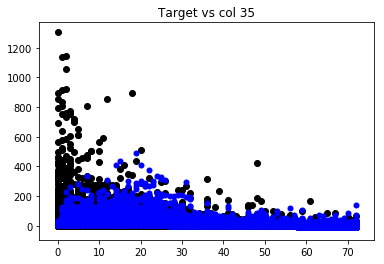

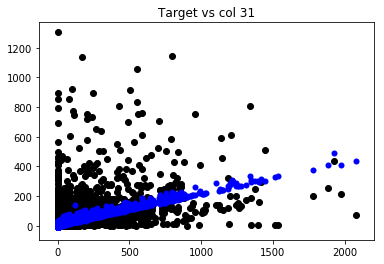

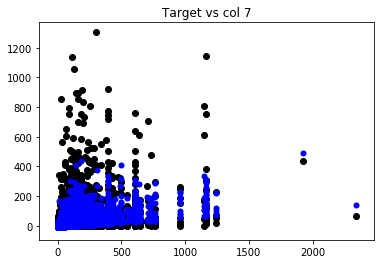

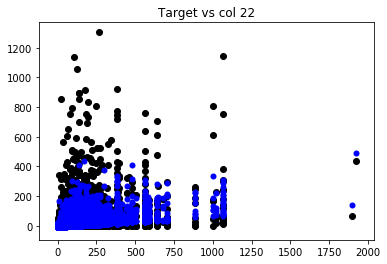

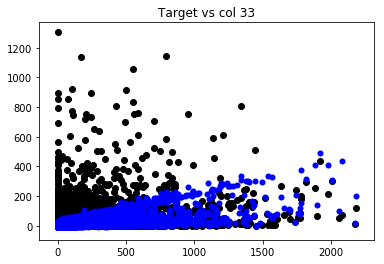

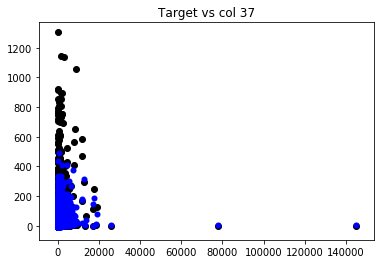

In [175]:
reg = sk.linear_model.LinearRegression()
reg.fit(selected_features,target)
print reg.score(selected_features,target).mean()
for col in [35,31,7,22,33,37]:
    # Plot outputs
    plt.title('Target vs col ' + `col`)
    plt.scatter(data[[col]], target,  color='black')
    plt.scatter(data[[col]], pred  ,  color='blue', linewidth=.03)

    plt.show()

### Step 2 : Multiple regression

First we do a polynomial regression

In [187]:
mult_reg_all_var = sk.linear_model.LinearRegression()
f = features[[35,31,7,22,33,37]]
selected_features = np.concatenate(
                    [
                        f,
                        f*f,
                        f*f*f
                    ]
                    ,axis=1)
scores = sk.model_selection.cross_val_score(mult_reg_all_var,selected_features,target,cv = 100)
#print scores
print scores.mean()
print (np.sort(scores))[10:].mean()
scores_sorted = np.array(sorted(scores))
print scores_sorted
print sum(scores_sorted>.6)/(1.*len(scores_sorted))

mult_reg_all_var.fit(selected_features,target)
print mult_reg_all_var.score(selected_features,target)

-9.00427587357
0.295112357305
[-502.32413 -379.94576  -14.8737   -10.5998    -8.15097   -3.62379
   -3.37196   -2.46736   -0.85065   -0.77958   -0.74669   -0.71055
   -0.63773   -0.58127   -0.37812   -0.30234   -0.28149   -0.27667
   -0.26338   -0.06183   -0.05245    0.03039    0.08171    0.14044
    0.15333    0.18217    0.19505    0.20351    0.21192    0.21988
    0.22554    0.22696    0.23721    0.23924    0.24002    0.24545
    0.24754    0.25338    0.25825    0.26568    0.26779    0.27275
    0.29006    0.29196    0.30233    0.32662    0.33493    0.33738
    0.3424     0.34913    0.35585    0.35798    0.35864    0.37176
    0.37406    0.37826    0.38494    0.38549    0.38755    0.39569
    0.39718    0.40311    0.40509    0.40956    0.41137    0.41908
    0.42721    0.42738    0.42895    0.43171    0.43472    0.43643
    0.43936    0.44279    0.44935    0.45566    0.47303    0.49007
    0.4914     0.50206    0.50369    0.50561    0.50786    0.51462
    0.51476    0.52273    0.5228

On the model below, both polynomials of dim 2 and 3 perform similar: a few samples have very bad scores, while the general behaviour is of a much better performance than the linear one.

More than 3 is quite a overfitting...

In [117]:
poly = sk.preprocessing.PolynomialFeatures(2)

mult_reg_all_var = sk.linear_model.LinearRegression()


f = features[[35,31,7,22,33,37,34]]
selected_features = poly.fit_transform(f)

scores = sk.model_selection.cross_val_score(mult_reg_all_var,selected_features,target,cv = 5)
#print scores
print selected_features.shape
print scores.mean()
print (np.sort(scores))[10:].mean()
scores_sorted = np.array(sorted(scores))
print scores_sorted
print sum(scores_sorted>.6)/(1.*len(scores_sorted))

mult_reg_all_var.fit(selected_features,target)
print mult_reg_all_var.score(selected_features,target)

(40949, 36)
-5.87951666308
nan
[-31.18232   0.30386   0.42303   0.50607   0.55179]
0.0
0.494575507269


/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: Mean of empty slice.


separar por variavel categorica

### General Model

Trying strong regression algorithms:
- Elastic Net
- Random Forests
- Neural Networks

In [140]:
#Elastic Net
poly = sk.preprocessing.PolynomialFeatures(2)
f = features[[35,31,7,22,33,37,34,39]]
selected_features = poly.fit_transform(f)

reg = sk.linear_model.ElasticNet(alpha=1, l1_ratio=.5)
reg.fit(selected_features,target)
print reg.score(selected_features,target)

scores = sk.model_selection.cross_val_score(mult_reg_all_var,selected_features,target,cv = 10)
print scores
print scores.mean()


0.488825446373
[ 0.61113  0.4997   0.35518  0.42415  0.60022  0.36611 -0.40077 -1.72011
  0.35216  0.35775]
0.144550610106


In [76]:
###Random forest

#Feature processing
poly = sk.preprocessing.PolynomialFeatures(3)
f = features[[35,31,7,22,33,37,34]]
selected_features = poly.fit_transform(f)

#model
reg = sk.ensemble.RandomForestRegressor()

#R2
reg.fit(selected_features,target)
print reg.score(selected_features,target)

#Cross Validation
scores = sk.model_selection.cross_val_score(reg,selected_features,target,cv = 5)
print scores
print scores.mean()

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.929528385763
[ 0.66319  0.53161  0.62859  0.45172  0.53604]
0.56222898808


In [102]:
###Random forest with more features

#Feature processing
poly = sk.preprocessing.PolynomialFeatures(2)
f = features[[35,31,7,22,33,37,34,8,23,17,13,29]]
selected_features = poly.fit_transform(f)

#model
reg = sk.ensemble.RandomForestRegressor()

#R2
reg.fit(selected_features,target)
print reg.score(selected_features,target)

#Cross Validation
scores = sk.model_selection.cross_val_score(reg,selected_features,target,cv = 5)
print scores
print scores.mean()

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.92774066768
[ 0.69125  0.51862  0.63546  0.41052  0.44649]
0.540466814141


In [75]:
###Random forest with more features
#TODO : add weekday labels!

#Feature processing
poly = sk.preprocessing.PolynomialFeatures(2)
f = features[[35,31,7,22,33,37,34,8,23,17,13,29]]
selected_features = poly.fit_transform(f)

selected_features = np.concatenate(
                                    [
                                        selected_features,
                                        data[[36,38,39,40,41]]    
                                    ]
                                    ,axis=1)


#model
reg = sk.ensemble.RandomForestRegressor()

#R2
reg.fit(selected_features,target)
print reg.score(selected_features,target)

#Cross Validation
scores = sk.model_selection.cross_val_score(reg,selected_features,target,cv = 5)
print scores
print scores.mean()

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.927312090061
[ 0.68059  0.52815  0.64211  0.45299  0.54439]
0.569645772856


In [104]:
###Random forest with more features
#TODO : add weekday labels!

#Feature processing
poly = sk.preprocessing.PolynomialFeatures(2)
f = features[[35,31,7,22,33,37,34,8,23,17,13,29]]
selected_features = poly.fit_transform(f)
f_prime = np.log(f.drop(34,axis=1)+1)

selected_features = np.concatenate(
                                    [
                                        selected_features,
                                        f_prime,
                                        data[[36,38,39,40,41]]    
                                    ]
                                    ,axis=1)


#model
reg = sk.ensemble.RandomForestRegressor()

#R2
reg.fit(selected_features,target)
print reg.score(selected_features,target)

#Cross Validation
scores = sk.model_selection.cross_val_score(reg,selected_features,target,cv = 5)
print scores
print scores.mean()

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.934431194104
[ 0.67877  0.57002  0.63156  0.40846  0.50778]
0.55931773967


In [49]:
###Random forest with more features
#TODO : add weekday labels!

#Feature processing
poly = sk.preprocessing.PolynomialFeatures(3)
f = features[[35,31,7,22,33,37,34,8,23,17,13,29]]
selected_features = poly.fit_transform(f)

#model
reg = sk.ensemble.RandomForestRegressor()

#R2
reg.fit(selected_features,target)
print reg.score(selected_features,target)

#Cross Validation
scores = sk.model_selection.cross_val_score(reg,selected_features,target,cv = 5)
print scores
print scores.mean()

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.933997498672
[ 0.62889  0.51922  0.66322  0.43888  0.50405]
0.550851878022


In [148]:
###Random forest with more features
###              and without polynomial transform

#Feature processing
selected_features = np.concatenate(
                                    [
                                        numerical_features,
                                        data[[36,38,39,40,41]],
                                    ]
                                    ,axis=1)
#model
reg = sk.ensemble.RandomForestRegressor(n_estimators=200,n_jobs=-1,oob_score = True,random_state=42)

#R2
reg.fit(selected_features,target)
print reg.score(selected_features,target)

#Cross Validation
scores = sk.model_selection.cross_val_score(reg,selected_features,target,cv = 5)
print scores
print scores.mean()

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.951353433132
[ 0.69962  0.54841  0.68276  0.52634  0.52717]
0.596859982923
